In [51]:
# Importamos librerias especificas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [52]:
# importamos la data creada en el WebScrapping.ipynb
asteroid_df_final = pd.read_csv("Data/asteroid_df_final.txt",sep="\t")
asteroid_df_final.head()

,nombre,smass,file
0,Abehiroshi,V,a005379.sp51.txt
1,Senrikyu,B,a005330.sp290n1.txt
2,Burbine,S,a005159.sp201n1.txt
3,Robinson,Sr,a003819.sp84.txt
4,Paris,T,a003317.sp50.txt


In [53]:
asteroid_df_final.drop(2,axis=0,inplace=True)
asteroid_df_final.index = range(len(asteroid_df_final))

In [54]:
asteroid_df_final.shape

(160, 3)

In [55]:
# Se crea una lista de los dataframes asociados a cada file de cada espectro con nombre dentro de VIS_NIR/.
df_list = []
for i in range(asteroid_df_final.shape[0]):
    df = pd.read_csv("VIS_NIR/{}".format(asteroid_df_final.file[i]), delim_whitespace=True, names = ['wavelenght', 'intensity', 'error', '-'])
    df.drop(['error', '-'], axis=1, inplace=True)
    df_list.append(df)

In [56]:
# Elimina los valores duplicados en la columna wavelenght que impiden realizar la interpolacion.
for i in range(len(df_list)):
    df_list[i].index = range(len(df_list[i]))
    ast_index = df_list[i][df_list[i].wavelenght.duplicated()].index
    df_list[i].drop(ast_index, inplace=True)

In [57]:
df_list[2]

,wavelenght,intensity
0,0.4350,0.7190
1,0.4375,0.7323
2,0.4400,0.7803
3,0.4425,0.7416
4,0.4450,0.7912
...,...,...
516,2.4700,-1.0000
517,2.4750,-1.0000
518,2.4800,-1.0000
519,2.4850,-1.0000


In [58]:
# Se define f como la funcion de interpolacion (diferente para cada espectro) por esto es una lista de todas las interpolaciones
# Tener en cuenta que y_temp asociado a los valores de intencidad son positivos, por lo que se utiliza valor absoluto
# Se utiliza interpolacion cubica para obtener la mejor aproximacion de los nuevos datos a los datos experimentales antiguos.
f = []
x = []
for i in df_list:
    x_temp = i.wavelenght
    y_temp = np.abs(i.intensity)
    f.append(interp1d(x_temp,y_temp,kind='cubic'))

In [59]:
# Se define los nuevos valores de x (wavelenght) definidos en un rango especifico que permita asignar a diferentes f, iguales x.
x_new = np.linspace(0.45,2.45,1000,endpoint=True)
data_spec = [i(x_new) for i in f]

In [60]:
# Se construye el nuevo y final dataframe con las columnas que requerimos para analizar.
data = pd.DataFrame(data_spec,columns=x_new)
data.head()

,0.450000,0.452002,0.454004,0.456006,0.458008,0.460010,0.462012,0.464014,0.466016,0.468018,...,2.431982,2.433984,2.435986,2.437988,2.439990,2.441992,2.443994,2.445996,2.447998,2.450000
0,0.9765,0.873727,0.802019,0.908693,0.992507,0.892887,0.806158,0.822114,0.824980,0.798456,...,1.453882,1.428696,1.286868,1.095002,0.999979,1.100082,1.281601,1.382604,1.370983,1.3453
1,1.1423,1.104633,1.062175,0.996224,0.949799,1.010879,1.060699,1.024171,1.030800,1.106784,...,0.991043,0.997508,1.001280,1.001278,1.000005,0.999570,0.999831,1.000092,1.000091,1.0000
2,0.8445,0.770504,0.786651,0.801385,0.780085,0.812111,0.815159,0.828218,0.823612,0.821009,...,1.696828,1.687543,1.699685,1.727674,1.741618,1.724284,1.714307,1.760465,1.817740,1.7467
3,0.9238,0.935045,0.928104,0.933731,0.943692,0.937315,0.953128,0.967190,0.969832,0.959735,...,2.056997,1.990262,1.979909,2.040457,1.958246,1.594457,1.155880,0.926450,0.944271,1.0000
4,0.8795,0.953828,0.956625,0.849646,0.784283,0.867913,0.938608,0.909334,0.893468,0.906256,...,1.482280,1.065135,1.077220,1.503595,1.945946,2.089067,2.025298,1.945494,1.926199,1.9289


In [61]:
# Se agrega al nuevo dataframe la columna predictora "spect_b" y el nombre del asteroide respectivo
data["spect_b"] = asteroid_df_final.smass
data["name"] = asteroid_df_final.nombre

In [62]:
# Se crea una lista de columnas con el order adecuado para mostrar "name" y "spect_b" al inicio.
n_col = [data.columns[-1],data.columns[-2]]
for i in data.columns[:-2].tolist():
    n_col.append(i)

# Se reorganiza el dataframe
data = data[n_col]

In [63]:
data.head()

,name,spect_b,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,Abehiroshi,V,0.9765,0.873727,0.802019,0.908693,0.992507,0.892887,0.806158,0.822114,...,1.453882,1.428696,1.286868,1.095002,0.999979,1.100082,1.281601,1.382604,1.370983,1.3453
1,Senrikyu,B,1.1423,1.104633,1.062175,0.996224,0.949799,1.010879,1.060699,1.024171,...,0.991043,0.997508,1.001280,1.001278,1.000005,0.999570,0.999831,1.000092,1.000091,1.0000
2,Robinson,Sr,0.8445,0.770504,0.786651,0.801385,0.780085,0.812111,0.815159,0.828218,...,1.696828,1.687543,1.699685,1.727674,1.741618,1.724284,1.714307,1.760465,1.817740,1.7467
3,Paris,T,0.9238,0.935045,0.928104,0.933731,0.943692,0.937315,0.953128,0.967190,...,2.056997,1.990262,1.979909,2.040457,1.958246,1.594457,1.155880,0.926450,0.944271,1.0000
4,Farinella,D,0.8795,0.953828,0.956625,0.849646,0.784283,0.867913,0.938608,0.909334,...,1.482280,1.065135,1.077220,1.503595,1.945946,2.089067,2.025298,1.945494,1.926199,1.9289


In [64]:
data.shape # Verificamos que el tamaño sea el acordado.

(160, 1002)

In [65]:
# Se crea un archivo de texto que almacene el nuevo dataset que se utilizara para realizar predicciones.
data.to_csv("Data/data_final.txt",sep="\t",index=None)

# -----------------------------------
## Explicacion de los rangos elegidos:


In [66]:
# Se toma los valores maximos y minimos de todos los dataframe de cada espectro y los almacenamos respectivamente en a y b
a = []
b = []
for i in df_list:
    a.append(max(i.wavelenght))
    b.append(min(i.wavelenght))

In [67]:
# Se observa que como el rango de interpolacion debe ser igual para todo, en el maximo existen 3 espectros que generan problemas
# Con el fin de conservar los asteroides a costo de perder informacion de longitudes de onda, se limitara el rango de interpolacion a 2.45 como maximo.
a_pd = pd.DataFrame({'0':a,'1':b})
a_pd['0'].value_counts()

2.49    157
2.45      3
Name: 0, dtype: int64

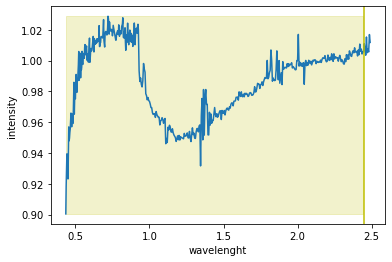

In [68]:
# graficamente solo se conserva los datos dentro de la franja amarilla
xx = df_list[-1].wavelenght
yy = np.abs(df_list[-1].intensity)

plt.plot(xx,yy)
plt.axvline(x=2.45,color='y')
plt.fill_between(x=xx[:496],y1=min(yy),y2=max(yy),color='y',alpha=0.2)
plt.xlabel("wavelenght")
plt.ylabel("intensity")
plt.show()

In [69]:
# Similarmente se observa el rango minimo, donde se utilizara 0.45 como el valor minimo del rango de interpolacion
a_pd['1'].value_counts()

0.4350    152
0.4400      5
0.4500      2
0.4375      1
Name: 1, dtype: int64

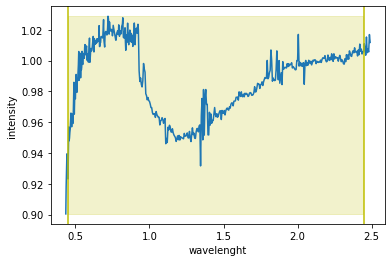

In [70]:
# graficamente solo se conserva los datos dentro de la franja amarilla
# notamos que en en total se perdieron 24 datos de longitudes de onda, pero pudimos conservar los asteroides para tener mas datos de analisis.
xx = df_list[-1].wavelenght
yy = np.abs(df_list[-1].intensity)

plt.plot(xx,yy)
plt.axvline(x=2.45,color='y')
plt.axvline(x=0.45,color='y')
plt.fill_between(x=xx[6:496],y1=min(yy),y2=max(yy),color='y',alpha=0.2)

plt.xlabel("wavelenght")
plt.ylabel("intensity")
plt.show()